# How does health insurance affect rates of use and abuse of opioids?
### Data Science - 2019
### Filipe Borba & Micah Reid

In [7]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from thinkstats2 import Pmf, Cdf
import thinkplot
width = 0.4 #Width of the histograms, optional

"The National Survey on Drug Use and Health (NSDUH) provides up-to-date information on tobacco, alcohol, and drug use, mental health and other health-related issues in the United States.

NSDUH began in 1971 and is conducted every year in all 50 states and the District of Columbia. This year almost 70,000 people will be interviewed for this important study.

Information from NSDUH is used to support prevention and treatment programs, monitor substance use trends, estimate the need for treatment and inform public health policy."

The data loaded here is the result of a cleaned version of the NSDUH 2018 dataset. Only the important variables were separated and treated so the analysis would be less confusing. If you want to know more about that, refer to the  [Data Management notebook.](/notebooks/project1/Data Management.ipynb)

We are very interested in the opioid crisis in the United States, so we wanted to investigate how the health insurance system is related to or even contributes to this problem. We have a more exploratory approach to the dataset and scenario, but we have explained each section for readability.

In [8]:
df = pd.read_pickle('cleaned_nsduh.pkl')
df.head(2)

,SEX,AGE,PRES_PAINKILLER_USE,REC_PAINKILLER_MISUSE,ANY_PAINKILLER_LIFETIME,OXYCONTIN_USE,OXYCONTIN_MISUSED,INCOME,FAMILY_INCOME,EDUCATION,CAIDCHIP_HI,PRIVATE_HI,ANY_HI,HEALTH_INSURANCE
0,Male,65+,Never used,Never misused,Not used,Not used in past year,Did not misuse - past year,75k+,75k+,College Graduate,Doesn't have Medicaid/CHIP,Has Private HI,With HI,Has Private HI
1,Male,35-49,Used in 12+ months,Never misused,Used,Not used in past year,Did not misuse - past year,30-40k,30-40k,College Graduate,Has Medicaid/CHIP,Doesn't have Private HI,With HI,Has Medicaid/CHIP


## Variables
### Example Variable Explanation Format:
**OUR_NAME** = nsduh_variable name = Question | (Possible responses)
Optional descriptor of survey method for question

### Demographics
**SEX** = irsex = Respondent's sex | ("Male","Female") 

**AGE** = AGE2 = Respondent's age | ("12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22-23", "24-25", "26-29", "30-34", "35-49", "50-64", "65+") 

**INCOME** = IRPINC3 = Respondent's total income | ("10k or less", "10-20k", "20-30k", "30-40k", "40-50k", "50-75k", "75k+")  

**FAMILY_INCOME** = IRFAMIN3 = Respondent's family total income | ("10k or less", "10-20k", "20-30k", "30-40k", "40-50k", "50-75k", "75k+")  

**EDUCATION** = eduhighcat = Respondent's education category | ("Less High School", "High School Grad", "Some Coll/Assoc Degree", "College Graduate", "12-17 year olds")  

### Health Insurance
**CAIDCHIP_HI** = irmcdchp = If respondent has or not the CAIDCHIP Health Insurance | ("Has Medicaid/CHIP", "Doesn't have Medicaid/CHIP")  

**PRIVATE_HI** = irprvhlt = If respondent has or not any Private Health Insurance | ("Has Private HI", "Doesn't have Private HI")  

**ANY_HI** = IRINSUR4 = If respondent has or not any kind of Health Insurance | ("With HI", "Without HI")  

**HEALTH_INSURANCE** = combination from the three categories above

### Pain Killer usage
Note: the following pain-relievers were defined as prescription pain relievers (excluding "over-the-counter" pain relievers such as aspirin, Tylenol, Advil, or Aleve). A picture of common prescription pain relievers (presumed to be opiates?????? How to phrase this), was presented to the survey taker to help with identification.

**ANY_PAINKILLER_LIFETIME** = pnranylif = Any pain reliever used in lifetime | ("Used", "Not used", "Used (assumed)", "Don't Know", "Refused", "Blank")  
**PRES_PAINKILLER_USE** = irpnranyrec = Any use of pain reliever | ("Used within year", "Used in 12+ months", "Never used")  
These 2 variables refer to any use of prescription drugs. Any Use of prescription drugs is defined as either the use of
one's own prescription medication as directed by a doctor or the misuse of prescription drugs.

**REC_PAINKILLER_MISUSE** = irpnrnmrec = Pain reliever misuse recency | ("Misused in last 30 days", "Misused 31 days-12 months", "Misused 12+ months", "Never misused")   
Refers to the misuse of prescription drugs. Misuse of prescription drugs is defined as use in any way not directed by a doctor, including use without a prescription of one's own medication; use in greater amounts, more often, or longer than told to take a drug; or use in any other way not directed by a doctor.

#### Note on the 'IR' variable prefix: 
Variables with the prefix 'IR' are to account for a shift that began in 2002, when missing values for many questions were no longer permitted. These variables have the prefix 'IR', which stands for 'Imputation Revised', only for the sake of consistency with data sets from
earlier surveys"

## Demographic Information
The first thing we'll analyse is the distribution of the relevant demographics of respondents in the dataset. This is done to check for oversampling. We're focused on the demographics that have the most influence on major life factors, like sex, income, and age.

3.912858056720453


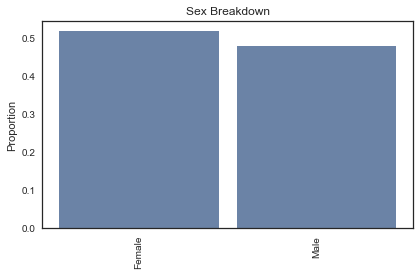

In [9]:
pmf_a = Pmf(df["SEX"])
thinkplot.Hist(pmf_a)
plt.xticks(np.arange(0, 2, step=1), rotation='vertical')
decorate(ylabel='Proportion', title = 'Sex Breakdown')
print((pmf_a["Female"] - pmf_a["Male"])*100)

As we can see from the sex PMF, the dataset has slightly more female respondents than male. The difference is 3.91%, which is not concerning.

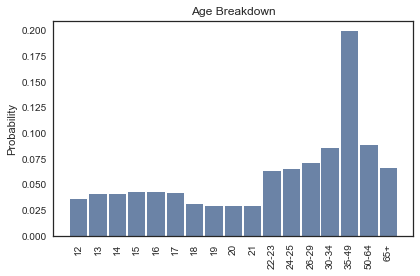

In [10]:
pmf_a = Pmf(df["AGE"])
thinkplot.Hist(pmf_a)
plt.xticks(np.arange(0, 17, step=1), rotation='vertical')
decorate(ylabel='Probability', title = 'Age Breakdown')

In [11]:
print("12-17: ", (pmf_a["12"]+pmf_a["13"]+pmf_a["14"]+pmf_a["15"]+pmf_a["16"]+pmf_a["17"])*100)
print("18-21: ", (pmf_a["18"]+pmf_a["19"]+pmf_a["20"]+pmf_a["21"])*100)
print("22-23: ", (pmf_a["22-23"])*100)
print("24-25: ", (pmf_a["24-25"])*100)
print("26-29: ", (pmf_a["26-29"])*100)
print("30-34: ", (pmf_a["30-34"])*100)
print("35-49: ", (pmf_a["35-49"])*100)
print("50-64: ", (pmf_a["50-64"])*100)
print("65+: ", (pmf_a["65+"])*100)

12-17:  24.38339611912716
18-21:  11.73857417016135
22-23:  6.317080105195822
24-25:  6.537422702395338
26-29:  7.088279195394128
30-34:  8.524059990049045
35-49:  19.926789395124032
50-64:  8.879451275854716
65+:  6.604947046698416


This distribution is tricky because we have different ranges of ages for every category, so we need to be extra careful while analysing.
Ages 12 to 21 are treated as seperate categories for each age, while the others are categorized by age ranges. By summing the proportions of ages 12-17 (minors) we can see that they represent a huge part of the dataset. If we consider the 12-21 year old range, they represent 36% of the respondents in the dataset. This is a relatively large proportion, so we have to consider oversampling for young people.


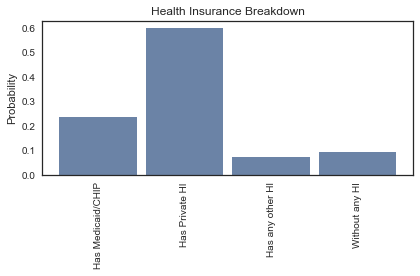

In [12]:
pmf_a = Pmf(df["HEALTH_INSURANCE"])
thinkplot.Hist(pmf_a)
plt.xticks(np.arange(0, 4, step=1), rotation='vertical')
decorate(ylabel='Probability', title = 'Health Insurance Breakdown')

In [13]:
pmf_a

Pmf({'Has Private HI': 0.5980169166252044, 'Has Medicaid/CHIP': 0.23610420072499824, 'Without any HI': 0.09396545596701969, 'Has any other HI': 0.07191342668277774})

Most people have Private Health Insurance in this dataset, so this alse needs to be taken into consideration. Almost 60% of the respondents have some type of private health insurance, so we will control for this in our investigation.

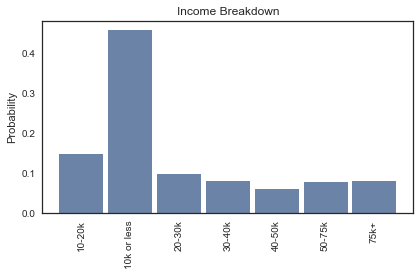

In [14]:
pmf_a = Pmf(df["INCOME"])
thinkplot.Hist(pmf_a)
plt.xticks(np.arange(0, 7, step=1), rotation='vertical')
decorate(ylabel='Probability', title = 'Income Breakdown')

A large proportion are 12-21 year olds, so that's a likely reason why the 10k or less category is has the highest proportion. Family Income can paint a more complete picture for those who are too young to make their own salary.

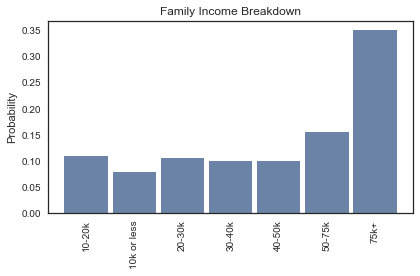

In [15]:
pmf_a = Pmf(df["FAMILY_INCOME"])
thinkplot.Hist(pmf_a)
plt.xticks(np.arange(0, 7, step=1), rotation='vertical')
decorate(ylabel='Probability', title = 'Family Income Breakdown')

Family Income has a better approach because it is not as dependant on the respondent's age. As we can see, the 75k+ category is higher, which is a likely reason why respondents in this dataset are more likely to have a private health insurance.

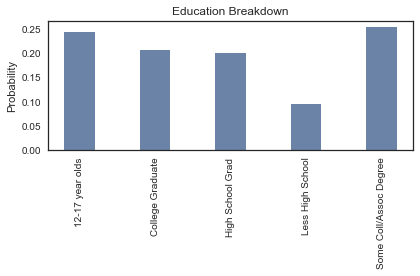

In [16]:
pmf_a = Pmf(df["EDUCATION"])
thinkplot.Hist(pmf_a, width=width)
plt.xticks(np.arange(0, 5, step=1), rotation='vertical')
decorate(ylabel='Probability', title = 'Education Breakdown')

Most of the respondents over 17 years old have at least finished High School. Only 10% of the respondents have less than High School education, which makes this group slightly underrepresented in the dataset. This is unsuprising given the economic factors.

## Comparing two groups
##### No health insurance vs Private health insurance

In [17]:
no_hi = df[df.HEALTH_INSURANCE != "Has Private HI"]
priv_hi = df[df.HEALTH_INSURANCE == "Has Private HI"]

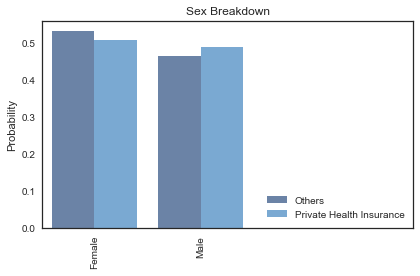

In [18]:
pmf_a = Pmf(no_hi["SEX"], label='Others')
pmf_b = Pmf(priv_hi["SEX"], label='Private Health Insurance')
thinkplot.Hist(pmf_a, align="right", width=width)
thinkplot.Hist(pmf_b, align="left", width=width)
plt.xticks(np.arange(0, 4, step=1), rotation='vertical')
decorate(ylabel='Probability', title='Sex Breakdown', loc='lower right')

Comparing both groups, we can see that there are small sex differences between the groups. Those who don't have private health insurance are slightly more likely to be female.

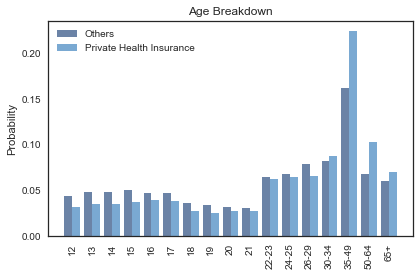

In [19]:
pmf_a = Pmf(no_hi["AGE"], label='Others')
pmf_b = Pmf(priv_hi["AGE"], label='Private Health Insurance')
thinkplot.Hist(pmf_a, align="right", width=width)
thinkplot.Hist(pmf_b, align="left", width=width)
plt.xticks(np.arange(0, 18, step=1), rotation='vertical')
decorate(ylabel='Probability', title='Age Breakdown', loc='upper left')

Looking at the age PMF for both groups, it is pretty visible that there's a significant difference in the 35-49 and 50-64 age range. This may be due to age related or cohort related financial factors.

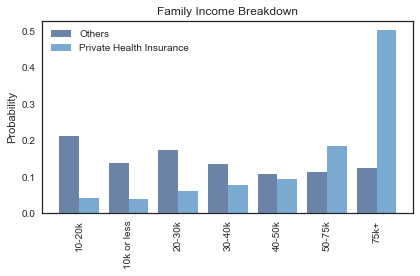

In [20]:
pmf_a = Pmf(no_hi["FAMILY_INCOME"], label='Others')
pmf_b = Pmf(priv_hi["FAMILY_INCOME"], label='Private Health Insurance')
thinkplot.Hist(pmf_a, align="right", width=width)
thinkplot.Hist(pmf_b, align="left", width=width)
plt.xticks(np.arange(0, 7, step=1), rotation='vertical')
decorate(ylabel='Probability', title='Family Income Breakdown', loc='upper left')

People with private insurance tend to be much wealthier than those without. This is unsuprising due to the cost of insurance.

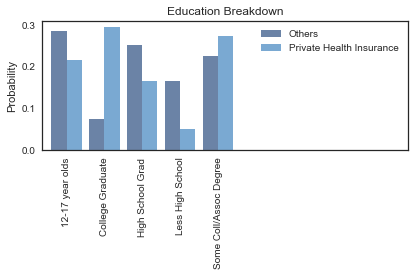

In [21]:
pmf_a = Pmf(no_hi["EDUCATION"], label='Others')
pmf_b = Pmf(priv_hi["EDUCATION"], label='Private Health Insurance')
thinkplot.Hist(pmf_a, align="right", width=width)
thinkplot.Hist(pmf_b, align="left", width=width)
plt.xticks(np.arange(0, 10, step=1), rotation='vertical')
decorate(ylabel='Probability', title='Education Breakdown', loc='upper right')

As expected, people who have private health insurance tend to have higher education levels than the other group.

## Exploring Crosstabs

#### Health Insurance and Painkiller use

In [22]:
ct = pd.crosstab(df["HEALTH_INSURANCE"], df["PRES_PAINKILLER_USE"], 
                 rownames=['Health Insurance'], colnames=['Used Prescription Painkillers'], 
                 margins=True, normalize='index')
(ct*100).round(decimals=3)

Used Prescription Painkillers,Used within year,Used in 12+ months,Never used
Health Insurance,,,
Has Medicaid/CHIP,32.189,12.900,54.911
Has Private HI,29.004,28.656,42.340
Has any other HI,34.198,23.449,42.352
Without any HI,28.177,19.232,52.591
All,30.052,23.676,46.272


As we can see from the crosstable, people who have a private health insurance or uncategorized health insurance were more likely to have taken opioids. This raises the question of whether increased access is the cause of this phenomenon. People who have Medicaid/CHIP were more likely to have taken painkillers within the year than people without insurance, but they were less likely to have used them more than a year ago. This suggests that those on Medicaid/Chip are using these drugs for longer time periods.

In [23]:
ct = pd.crosstab(df["HEALTH_INSURANCE"], df["REC_PAINKILLER_MISUSE"],
                 rownames=['Health Insurance'], colnames=['Misused Prescription Painkillers'],
                  margins=True, normalize='index')
(ct*100).round(decimals=3)

Misused Prescription Painkillers,Misused in last 30 days,Misused 31 days-12 months,Misused 12+ months,Never misused
Health Insurance,,,,
Has Medicaid/CHIP,1.957,4.260,4.892,88.891
Has Private HI,1.037,3.046,6.029,89.888
Has any other HI,1.334,2.891,4.868,90.907
Without any HI,2.402,4.293,6.222,87.084
All,1.404,3.438,5.695,89.463


Misuse of prescription drugs is defined as use in any way not directed by a doctor, including use without a prescription of one's own medication; use in greater amounts, more often, or longer than told to take a drug; or use in any other way not directed by a doctor.  
As we can see from the crosstab, there a few small differences between the misuse of the groups. In general, people without any health insurance are slightly more likely to have misused opioids in some way. It is also worth noting that those with private health insurance were more likely to have misused in the past, while those on Medicaid/CHIP were more likely to have misused recently.

In [24]:
ct = pd.crosstab(df["ANY_HI"], df["PRES_PAINKILLER_USE"], 
                 rownames=['Any Health Insurance'], colnames=['Used Prescription Painkillers'],
                 margins=True, normalize="index")
(ct*100).round(decimals=3)

Used Prescription Painkillers,Used within year,Used in 12+ months,Never used
Any Health Insurance,,,
With HI,30.246,24.137,45.617
Without HI,28.177,19.232,52.591
All,30.052,23.676,46.272


However, by sorting people with and without any health insurance, we can see that having any type of health insurance seems to be related to increased opioid use in the short and long term.

#### Filtering by: Used any painkiller

In order to analyze frequency and recency of use, we will filter out anyone who has never used opioids since they will always have null results. With that, we can see a higher relative difference in the variables and focus on continued versus past use.

In [25]:
used_pk = df[df.PRES_PAINKILLER_USE != "Never used"]

In [26]:
ct = pd.crosstab(used_pk["HEALTH_INSURANCE"], used_pk["PRES_PAINKILLER_USE"],
                 rownames=['Health Insurance'], colnames=['Used Prescription Painkillers'],
                 margins=True, normalize='index')
(ct*100).round(decimals=3)

Used Prescription Painkillers,Used within year,Used in 12+ months
Health Insurance,,
Has Medicaid/CHIP,71.390,28.610
Has Private HI,50.301,49.699
Has any other HI,59.323,40.677
Without any HI,59.434,40.566
All,55.933,44.067


Of those who had ever used prescription painkillers, those on Medicaid/CHIP had a significantly higher chance of taking them recently than the other groups. People who have private health insurance were more likely to have taken them in the past.

In [27]:
ct = pd.crosstab(used_pk["HEALTH_INSURANCE"], used_pk["REC_PAINKILLER_MISUSE"],
                 rownames=['Health Insurance'], colnames=['Misused Prescription Painkillers'],
                  margins=True, normalize='index')
(ct*100).round(decimals=3)

Misused Prescription Painkillers,Misused in last 30 days,Misused 31 days-12 months,Misused 12+ months,Never misused
Health Insurance,,,,
Has Medicaid/CHIP,4.340,9.448,10.850,75.363
Has Private HI,1.799,5.282,10.456,82.463
Has any other HI,2.315,5.015,8.444,84.226
Without any HI,5.066,9.055,13.123,72.756
All,2.613,6.400,10.600,80.388


By only selecting people who have taken pain relievers at some point, the difference between the groups of health insurance become more apparent. Within this group, people without any health insurance and people with Medicaid/CHIP were more likely to have misused pain relievers.

In [28]:
ct = pd.crosstab(used_pk["ANY_HI"], used_pk["PRES_PAINKILLER_USE"], 
                 rownames=['Any Health Insurance'], colnames=['Used Prescription Painkillers'],
                 margins=True, normalize="index")
(ct*100).round(decimals=3)

Used Prescription Painkillers,Used within year,Used in 12+ months
Any Health Insurance,,
With HI,55.617,44.383
Without HI,59.434,40.566
All,55.933,44.067


Of those who had ever used prescription painkillers, those without any health insurance were more likely to have taken them recently (within a year). Yet again, this suggests continued versus past usage.


DO WE NEED TO ANALYZE MORE HERE???

## Explorimg PMFs

Here we want to get a more visual look at the distributions. For that, we plot different PMFs and analyse them.

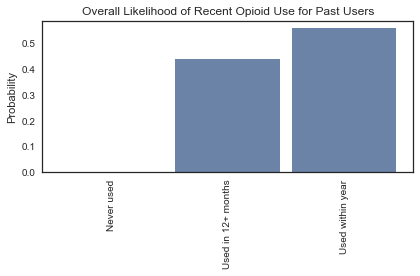

In [29]:
pmf_a = Pmf(used_pk["PRES_PAINKILLER_USE"])
thinkplot.Hist(pmf_a)
plt.xticks(np.arange(0, 3, step=1), rotation='vertical')
decorate(ylabel='Probability', title='Overall Likelihood of Recent Opioid Use for Past Users')

Over half of all people who have ever tried opioids have continued to take them in the past year. Some of this could be because first time use was in the past year, but it is unlikely to be a majority. The more likely cause of this is that these people have continued their use over time.

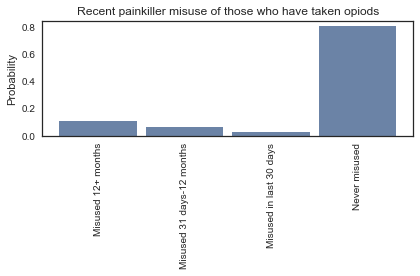

In [30]:
pmf_a = Pmf(used_pk["REC_PAINKILLER_MISUSE"])
thinkplot.Hist(pmf_a)
plt.xticks(np.arange(0, 4, step=1), rotation='vertical')
decorate(ylabel='Probability', title='Recent painkiller misuse of those who have taken opiods')

The recent painkiller misuse PMF shows us the distribution of misuse for all the respondents. We can see that people are more likely to have misused them within more than a year from the survey. It is more visual than the crosstab.

## Comparing two groups

Here we make a few histograms that compare the two groups: people who have private health insurance and those who have others or not at all. We separate private health insurance because it seems to have the most pronounced differences compared to the other two groups. We are looking to see if these differences translate when these groups are combined.

In [31]:
no_hi = df[df.HEALTH_INSURANCE != "Has Private HI"]
priv_hi = df[df.HEALTH_INSURANCE == "Has Private HI"]

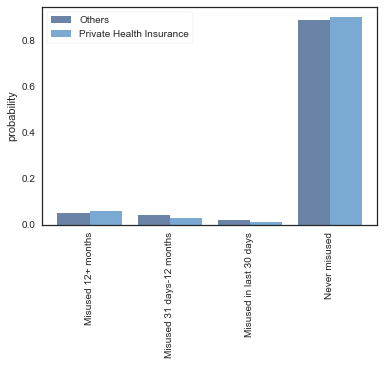

In [32]:
pmf_a = Pmf(no_hi["REC_PAINKILLER_MISUSE"])
pmf_b = Pmf(priv_hi["REC_PAINKILLER_MISUSE"])
thinkplot.Hist(pmf_a, align='right', width=width, label = 'Others')
thinkplot.Hist(pmf_b, align='left', width=width, label = 'Private Health Insurance')
plt.xticks(np.arange(0, 4, step=1), rotation='vertical')
thinkplot.Config(ylabel='probability')

Within the year of the survey, those without private health insurance were more likely to have abused painkillers than those with private health insurance. People with private health insurance were more likely to have abused them in the past (more than a year from the survey).

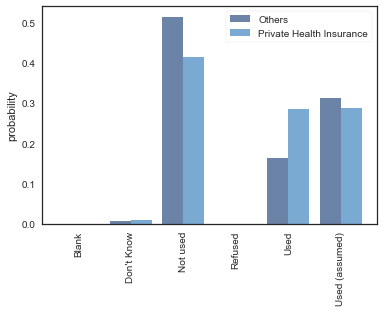

In [27]:
pmf_c = Pmf(no_hi["ANY_PAINKILLER_LIFETIME"])
pmf_d = Pmf(priv_hi["ANY_PAINKILLER_LIFETIME"])
thinkplot.Hist(pmf_c, align='right', width=width, label = 'Others')
thinkplot.Hist(pmf_d, align='left', width=width, label = 'Private Health Insurance')
plt.xticks(np.arange(0, 6, step=1), rotation='vertical')
thinkplot.Config(ylabel='probability')

In this PMF we can see that people with private health insurance were more likely to have had a prescription pain reliever in their lifetime. We can check that in more depth by plotting the PRES_PAINKILLER_USE variable PMF.

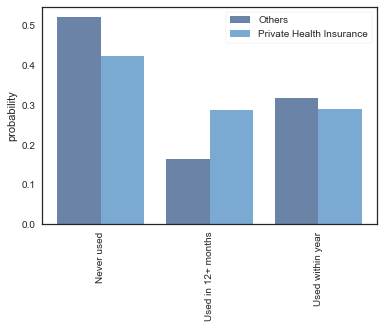

In [28]:
pmf_e = Pmf(no_hi["PRES_PAINKILLER_USE"])
pmf_f = Pmf(priv_hi["PRES_PAINKILLER_USE"])
thinkplot.Hist(pmf_e, align='right', width=width, label = 'Others')
thinkplot.Hist(pmf_f, align='left', width=width, label = 'Private Health Insurance')
plt.xticks(np.arange(0, 3, step=1), rotation='vertical')
thinkplot.Config(ylabel='probability')

In [29]:
print(pmf_e)
print(pmf_f)
diff = (pmf_f["Used in 12+ months"] - pmf_e["Used in 12+ months"])*100
print(round(diff, 2))

Pmf({'Never used': 0.5212182830872601, 'Used within year': 0.31610821324374505, 'Used in 12+ months': 0.16267350366899477})
Pmf({'Never used': 0.4233969216140726, 'Used within year': 0.29003981696083675, 'Used in 12+ months': 0.2865632614250906})
12.39


One thing that particularly stands out is that people that have private health insurance were 12.39% more likely to have taken any kind of prescription pain reliever in the past year. This is partially surprising because this group has better financial resources and education, so we would expect them to have the ability and inclination to explore other options. However, this group also has increased access to medical appointments and has more money to pay for prescriptions. Perhaps this increased availability contributes to overuse. This link is explored in [this paper.](https://www.jhsph.edu/news/news-releases/2018/health-insurance-plans-may-be-fueling-opioid-epidemic.html)